# EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('itunes_data.csv')
df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         3503 non-null   object 
 1   Composer      2525 non-null   object 
 2   Milliseconds  3503 non-null   int64  
 3   Bytes         3503 non-null   int64  
 4   UnitPrice     3503 non-null   float64
 5   Genre         3503 non-null   object 
 6   Album         3503 non-null   object 
 7   Artist        3503 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 219.1+ KB


In [5]:
df.nunique(axis=0)

Track           3257
Composer         852
Milliseconds    3080
Bytes           3501
UnitPrice          2
Genre             25
Album            347
Artist           204
dtype: int64

#### Dimensional Analysis

In [6]:
df['Minutes'] = df['Milliseconds']/(1000*60)

df['MB'] = df['Bytes'] / 1000000

In [7]:
df.drop(['Milliseconds', 'Bytes'], axis=1, inplace=True)

In [8]:
df.head()

,Track,Composer,UnitPrice,Genre,Album,Artist,Minutes,MB
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,5.728650,11.170334
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.427700,6.713451
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.898767,7.636561
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.513900,6.852860
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.385033,6.599424


In [9]:
import matplotlib.pyplot as plt

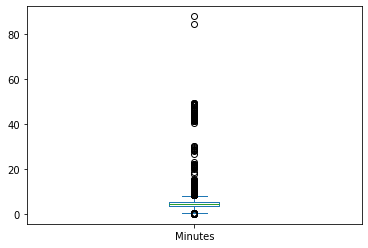

In [11]:
df['Minutes'].plot.box()
plt.show()

In [12]:
import seaborn as sns

<AxesSubplot:ylabel='Minutes'>

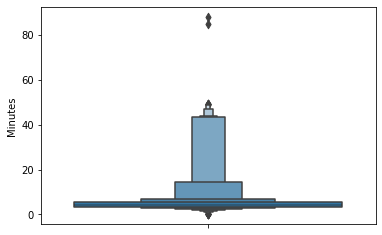

In [13]:
sns.boxenplot(y = df['Minutes'])

<AxesSubplot:>

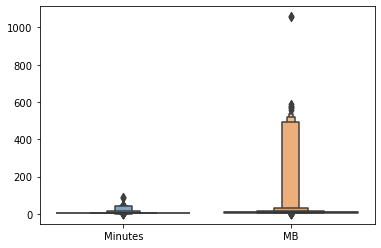

In [14]:
sns.boxenplot(data = df[['Minutes', 'MB']])

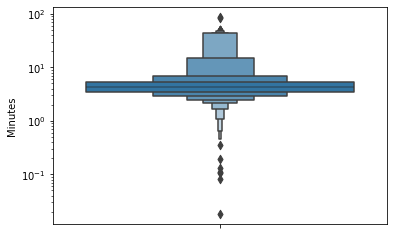

In [15]:
sns.boxenplot(y = df['Minutes'])
plt.yscale('log')

In [16]:
df.describe()

,UnitPrice,Minutes,MB
count,3503.000000,3503.000000,3503.000000
mean,1.050805,6.559987,33.510207
std,0.239006,8.916757,105.392534
min,0.990000,0.017850,0.038747
25%,0.990000,3.454683,6.342566
50%,0.990000,4.260567,8.107896
75%,0.990000,5.360750,10.266789
max,1.990000,88.115883,1059.546140


<AxesSubplot:xlabel='Minutes', ylabel='Count'>

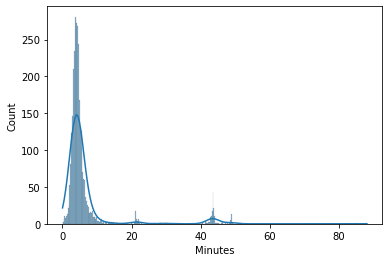

In [17]:
sns.histplot(x=df['Minutes'], kde=True)  # kernel density estimation

<AxesSubplot:xlabel='Minutes'>

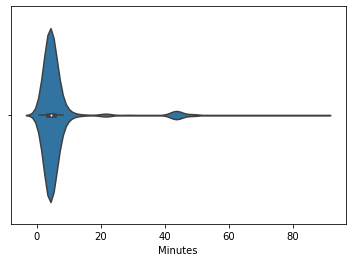

In [18]:
sns.violinplot(data=df, x='Minutes')

In [19]:
top_5_genres = df['Genre'].value_counts().index[:5]

top_5_data = df[df['Genre'].isin(top_5_genres)]

<AxesSubplot:xlabel='Minutes', ylabel='Genre'>

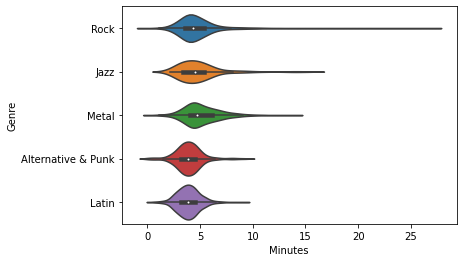

In [20]:
sns.violinplot(data=top_5_data, x='Minutes', y='Genre')

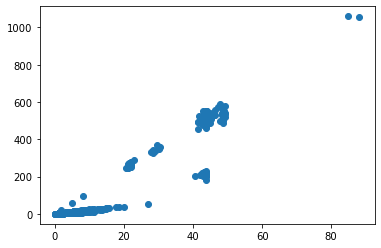

In [21]:
plt.scatter(df['Minutes'], df['MB'])

Text(0, 0.5, 'MB')

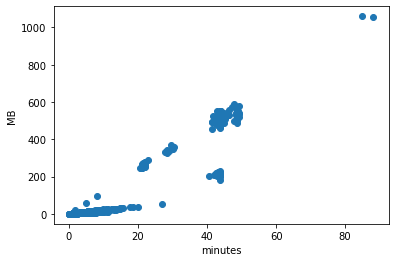

In [22]:
plt.scatter(df['Minutes'], df['MB'])
plt.xlabel('minutes')
plt.ylabel('MB')

<AxesSubplot:xlabel='Minutes', ylabel='MB'>

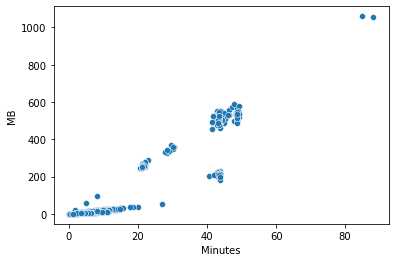

In [23]:
sns.scatterplot(data=df, x='Minutes', y='MB')

<AxesSubplot:xlabel='Minutes', ylabel='MB'>

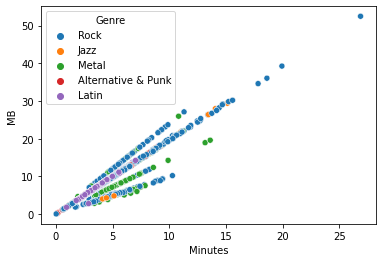

In [24]:
sns.scatterplot(data=top_5_data, x='Minutes', y='MB', hue='Genre')

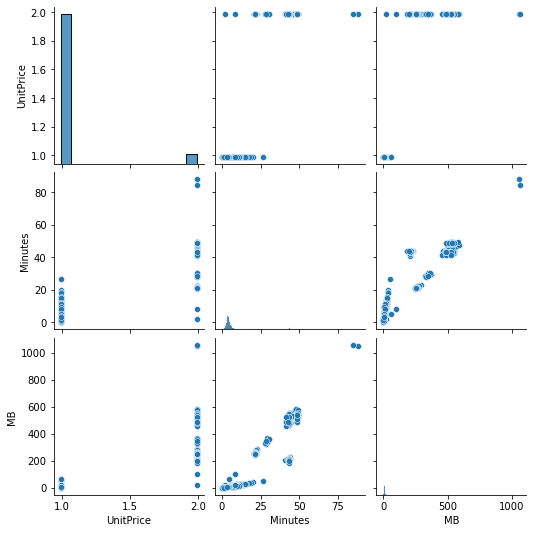

In [25]:
sns.pairplot(data=df)

<AxesSubplot:>

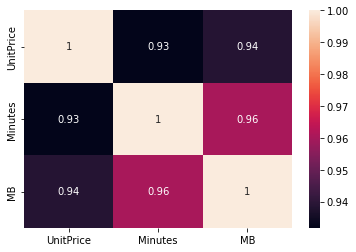

In [26]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

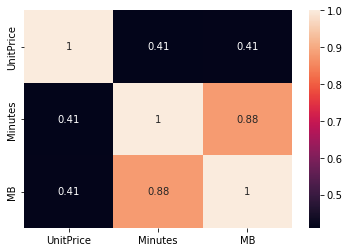

In [27]:
sns.heatmap(df.corr(method='spearman'), annot=True)

### missing values through plots

In [28]:
!pip install missingno

In [29]:
import missingno as msno

<AxesSubplot:>

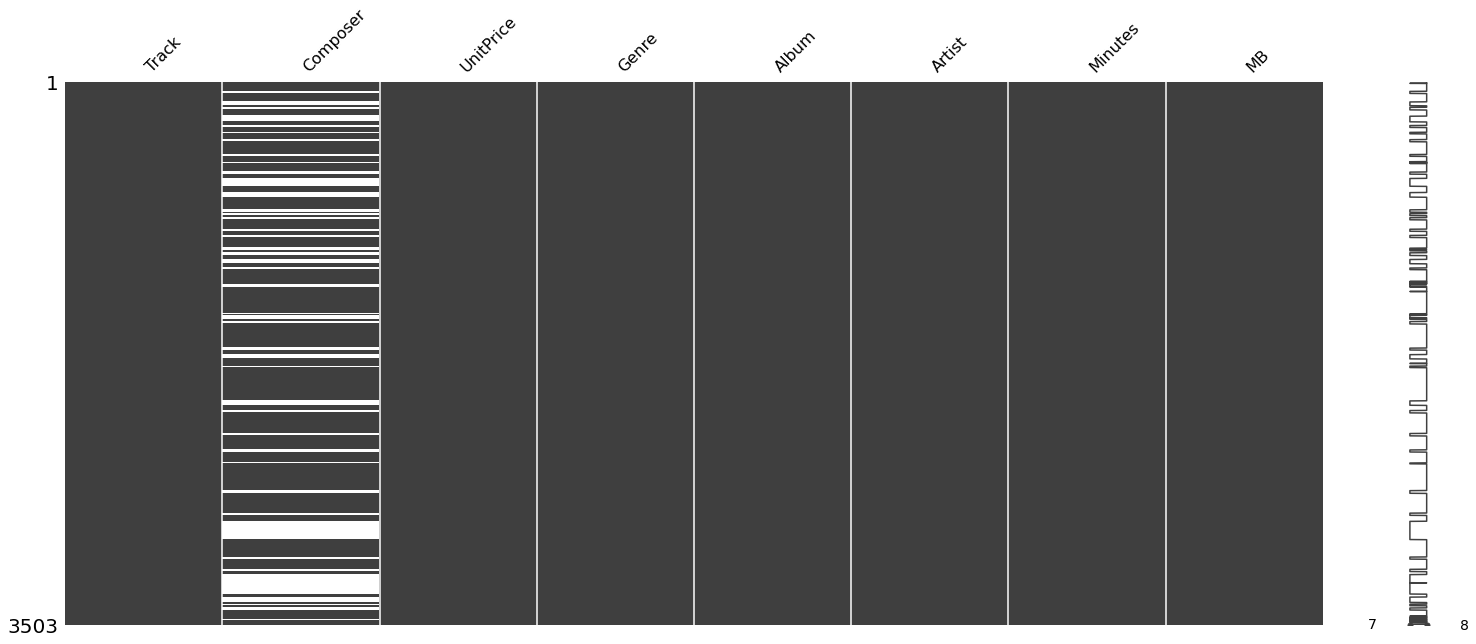

In [30]:
msno.matrix(df)

## EDA summary using Pandas Profiling

In [32]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=ff0bca2339091901a96f2090fdd14cc31223f1dd8c30643f8e17e6051a73d77b
  Stored in directory: c:\users\himan\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1


In [33]:
from pandas_profiling import ProfileReport

C:\Users\himan\AppData\Local\Temp\ipykernel_20104\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [34]:
report = ProfileReport(df)

report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]